# First Example

## Notebook Overview 
The purpose of this notebook is to analyze the performance of various machine and deep learning models through training and evaluation on the CityLearn Challenge 2023 dataset.

### Imports
This section imports essential libraries used throughout the notebook and adds the 'src' directory to the system path to allow importing modules from the source folder. 

In [1]:
import pandas as pd
import numpy as np
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

from dl_models import ANN as ann
from dl_models import RNN as rnn
from ml_models import RandomForest as rf
from ml_models import PolynomialFeatures as pf
from utils import plots as plt

## Comparing Models on Cooling Demand
The first analysis compares the performance of an Artificial Neural Network, a Recurrent Neural Network, a Random Forest, and a Polynomial Features approach. All models are trained and tested on the Cooling Demand target, while the following notebooks will also explore additional targets of interest.

In [2]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Displaying the last 5 samples of the dataframe to show its structure.
df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [3]:
target = 'cooling_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [4]:
real_ann, pred_ann = ann.ANN(df, features, target)

7/7 [==============================] - 0s 1ms/step


In [5]:
real_poly, pred_poly = pf.Polynomial(df, features, target, 5)

In [6]:
real_rf, pred_rf = rf.RandomForest(df, features, target)

In [7]:
real_rnn, pred_rnn = rnn.RNN(df, target, 5)

Epoch 1/150
13/13 [==============================] - 2s 63ms/step - loss: 1.6319 - mean_absolute_error: 0.4911 - val_loss: 0.0195 - val_mean_absolute_error: 0.1121
Epoch 2/150
13/13 [==============================] - 0s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.1193 - val_loss: 0.0165 - val_mean_absolute_error: 0.0952
Epoch 3/150
13/13 [==============================] - 0s 24ms/step - loss: 0.0163 - mean_absolute_error: 0.0995 - val_loss: 0.0126 - val_mean_absolute_error: 0.0823
Epoch 4/150
13/13 [==============================] - 0s 22ms/step - loss: 0.0142 - mean_absolute_error: 0.0890 - val_loss: 0.0141 - val_mean_absolute_error: 0.0876
Epoch 5/150
13/13 [==============================] - 0s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0728 - val_loss: 0.0090 - val_mean_absolute_error: 0.0697
Epoch 6/150
13/13 [==============================] - 0s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0641 - val_loss: 0.0115 - val_mean_absolute_error: 0.0781
Epoch 7/150
13/1

In [8]:
models = {
    'ANN': (real_ann, pred_ann),
    'Polynomial': (real_poly, pred_poly),
    'RandomForest': (real_rf, pred_rf),
    'RNN': (real_rnn, pred_rnn)
}

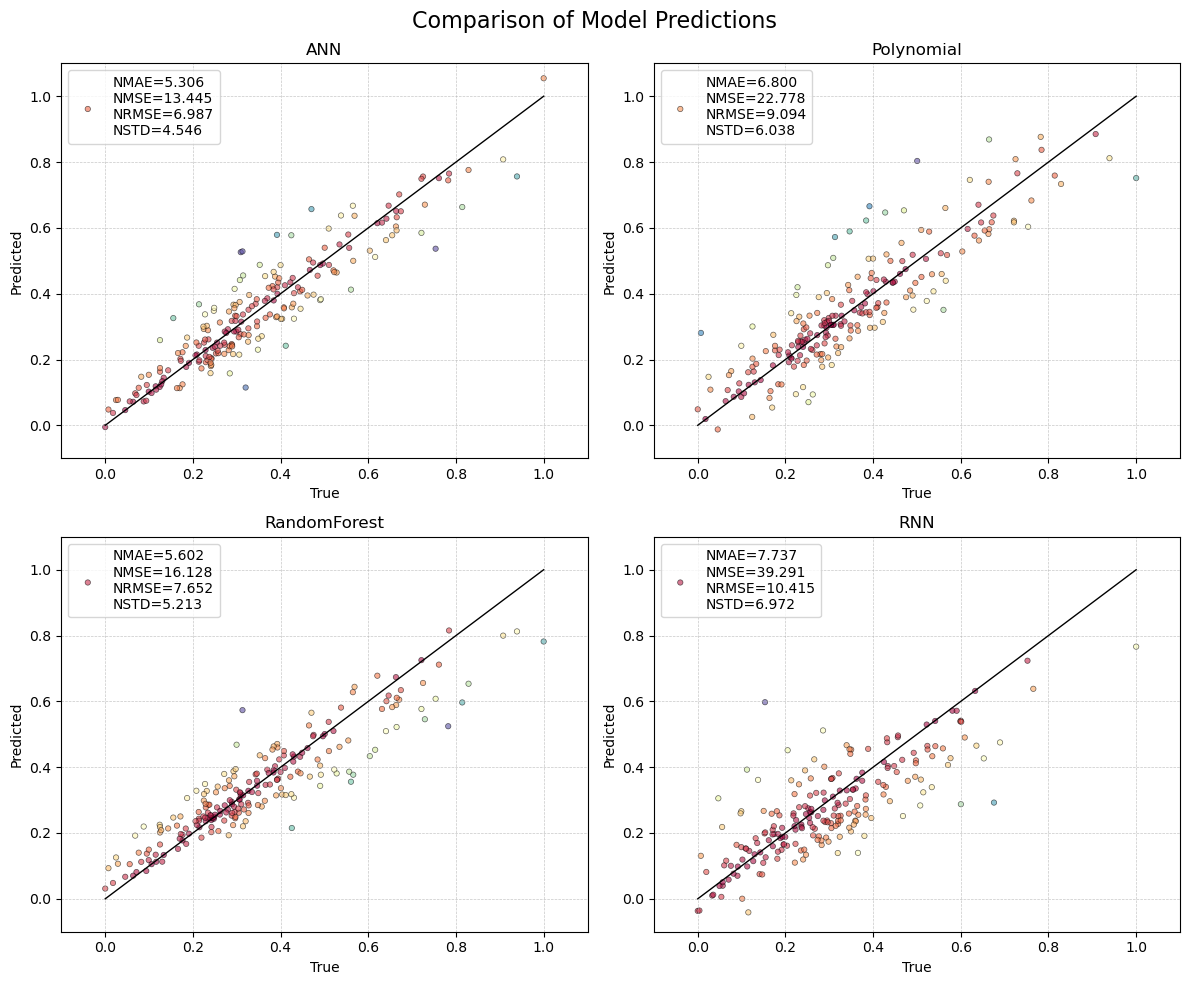

In [9]:
plt.plot_cmp(models, percent=True, filename="comparison_1.png")

## K-Fold Validation on ANN and Random Forest
This section applies K-Fold Cross Validation to the ANN and Random Forest for a more reliable evaluation across multiple folds.

In [10]:
real_ann_k, pred_ann_k = ann.ANN(df, features, target, n_splits = 10)

3/3 [==============================] - 0s 2ms/step


In [11]:
real_rf_k, pred_rf_k = rf.RandomForest(df, features, target, n_splits = 10)

In [12]:
models_k = {
    'ANN': (real_ann, pred_ann),
    'ANN_KFold': (real_ann_k, pred_ann_k),
    'RandomForest': (real_rf, pred_rf),
    'RandomForest_KFold': (real_rf_k, pred_rf_k)
}

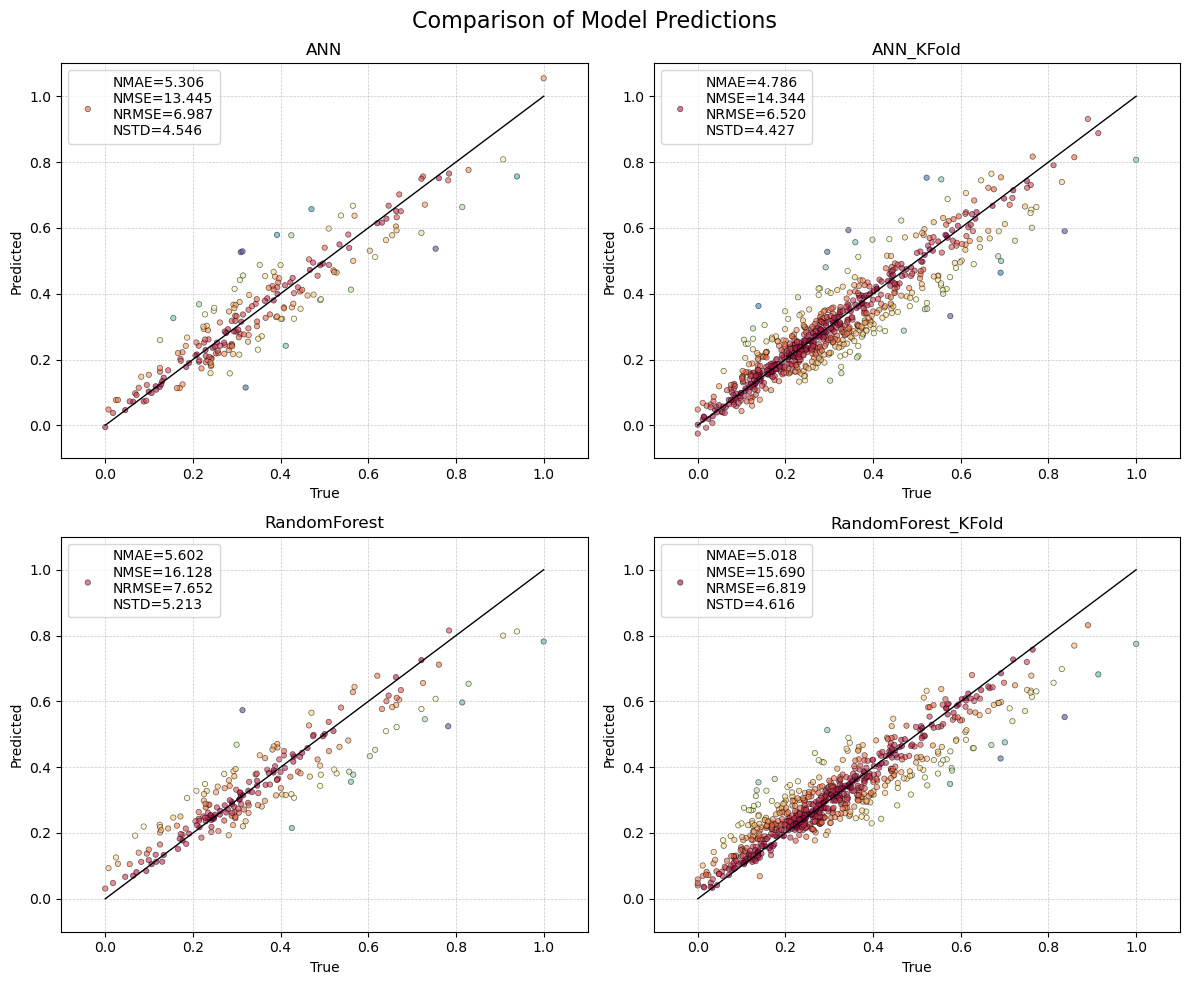

In [13]:
plt.plot_cmp(models_k, percent = True, filename="comparison_2.png")